In [1]:
import networkx as nx
import random
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [4]:
def spanning_tree(nodes):
    
    #check number of edges. Will confirm later
    
    #Randomly sample from the list of nodes
    n0 = random.choice(nodes)
    
    #initialization
    ST = set() #null set to collect the nodes for the spanning tree
    Nodes = set(nodes) #convert the list of nodes into a set for easier updating
    state_node = n0 #initial node
    G = nx.Graph() #undirected graph with no self-loop, and not multigraph
    
    #Update the two sets
    ST.add(state_node)
    Nodes.remove(state_node)
    
    while Nodes:
        
        #draw an adjacent node from the list of nodes
        ad_node = random.choice(nodes)
        
        if ad_node not in ST:#ie if the adjacent node has not been visited for the first time, we add it to the ST
            #update the two sets and add edge to G
            ST.add(ad_node)
            Nodes.remove(ad_node)
            G.add_edge(state_node, ad_node)
        else:#ie if the adjacent node has been visited for the first time, we want to remain there or update
            state_node = ad_node
    return G

def connected_graph(nodes, number_edges):

    G = spanning_tree(nodes) #retrieve the spanning tree upon which the graph will be built
    
    # save the edgelist of the spanning tree for computation purposes
    edge_list = G.edges()
    #np.save('./data/spanningTree.npy', np.array(edge_list)) 
    
    #Randomly add edges until we get the number of required edges        
    while G.number_of_edges() < number_edges:
        
        #add random edges
        n_r, n_k = (random.choice(nodes), random.choice(nodes))
        if G.has_edge(n_r,n_k) or n_r == n_k: #controls no self-loop or multigraph
            continue #no action taken
        else:
            #add the random edges (n_r,n_k)
            G.add_edge(n_r,n_k)
    
    #np.save('./data/connectedGraph.npy', np.array(G.edges()))  #save the edgelist for computation purposes  
    return G #return the connected graph with the required number of edges


Remark: 
The two np.save() functions above were commented on purpose. Due to the random of the process, I decided to collect the data once and work with it. So, the results of my work is from the data collected from the function and saved in the data folder. So cell is for illustration to show the code is working and cell 3 is where I loaded the data I am working with. So graph in cell 2 will be slightly different from cell 3.

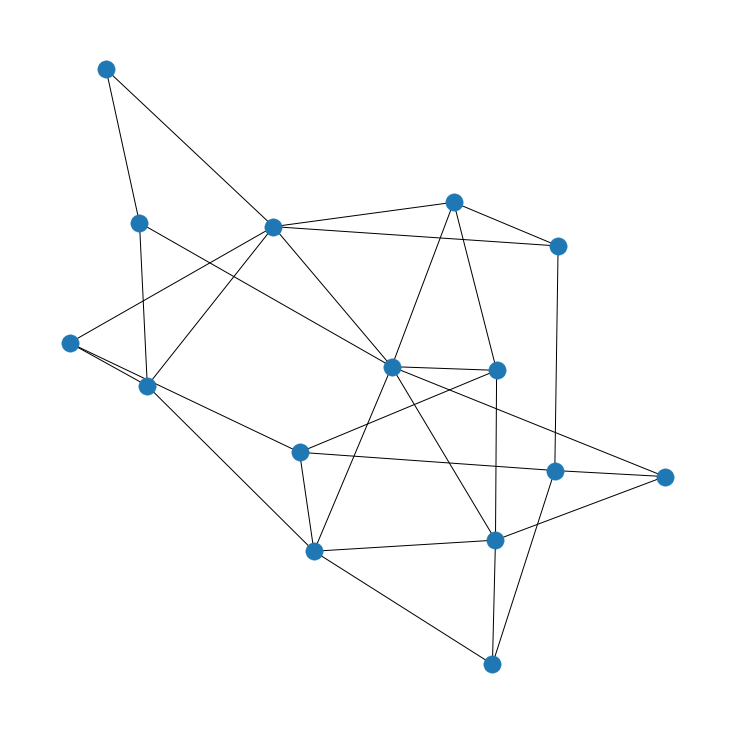

In [5]:
#Implementation
nodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]   
num_edges = 30 #The least number of edges required chosen to make life easier :)
Example_CG = connected_graph(nodes,num_edges)
plt.figure(figsize=(10,10))
nx.draw(Example_CG)

In [31]:
#load simulated dataset

#connected graph edgelist
with open('./data/connectedGraph.npy', 'rb') as f:
    edges_CG = np.load(f)
    f.close()

#Spanning tree edgelist
with open('./data/spanningTree.npy', 'rb') as f:
    edges_ST = np.load(f)
    f.close()

#create a graph from the saved data
CG = nx.Graph()
ed = [tuple(edge) for edge in edges_CG] #transform the entries of the loaded data into a tuple
CG.add_nodes_from(nodes)
CG.add_edges_from(ed) #add all edges from the loaded data

# Visualization

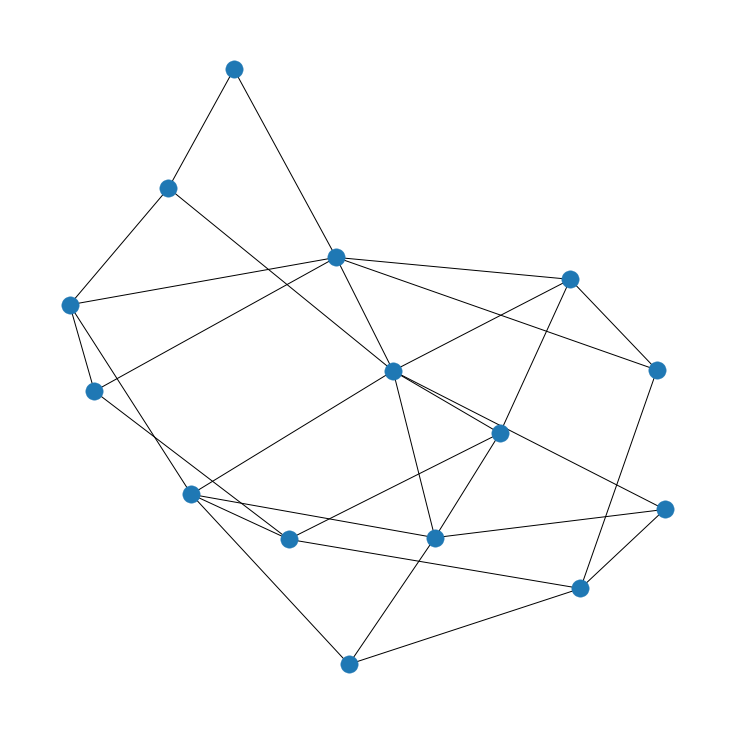

In [45]:
plt.figure(figsize=(10,10))
pos = nx.fruchterman_reingold_layout(CG)
nx.draw(CG,pos)
#plt.savefig('./data/CG.png')

In [37]:
nx.adjacency_matrix(CG).todense()

matrix([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])